# LINEAR REGRESSOR ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Stellar.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09 00:00:00+00:00,0.033792,0.040380,0.033744,0.039946,32813200,0.0,0.0
1,2017-11-10 00:00:00+00:00,0.039833,0.039833,0.031366,0.033073,32634200,0.0,0.0
2,2017-11-11 00:00:00+00:00,0.033083,0.035829,0.031881,0.033053,17914400,0.0,0.0
3,2017-11-12 00:00:00+00:00,0.032965,0.033334,0.027469,0.028182,17002300,0.0,0.0
4,2017-11-13 00:00:00+00:00,0.028115,0.031968,0.028041,0.030656,11245700,0.0,0.0


In [4]:
del df['Stock Splits']
del df['Dividends']
del df['Date']

In [5]:
df.head()

,Open,High,Low,Close,Volume
0,0.033792,0.040380,0.033744,0.039946,32813200
1,0.039833,0.039833,0.031366,0.033073,32634200
2,0.033083,0.035829,0.031881,0.033053,17914400
3,0.032965,0.033334,0.027469,0.028182,17002300
4,0.028115,0.031968,0.028041,0.030656,11245700


In [6]:
df=df.dropna()

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
x = df.drop(labels='Close', axis=1)
y = df.loc[:,'Close']

In [9]:
x

,Open,High,Low,Volume
0,0.033792,0.040380,0.033744,32813200
1,0.039833,0.039833,0.031366,32634200
2,0.033083,0.035829,0.031881,17914400
3,0.032965,0.033334,0.027469,17002300
4,0.028115,0.031968,0.028041,11245700
...,...,...,...,...
2688,0.290705,0.292061,0.278085,215417439
2689,0.281143,0.287296,0.274571,190002738
2690,0.276739,0.279676,0.273643,114803656
2691,0.274046,0.283558,0.273339,162782532


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2154
NUMBER OF TEST DATASET      :  539
TOTAL NUMBER OF DATASET    :  2693


In [11]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2154
NUMBER OF TEST DATASET      :  539
TOTAL NUMBER OF DATASET    :  2693


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [14]:
predicted = LR.predict(x_test)

In [15]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF LINEAR REGRESSER IS :",R2*100)

THE R2 SCORE OF LINEAR REGRESSER IS : 99.63473990360316


In [16]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF LINEAR REGRESSER IS :",RAND*100)

THE ACCURACY SCORE OF LINEAR REGRESSER IS : 100.0


In [17]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF LINEAR REGRESSER IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF LINEAR REGRESSER IS : 0.996357233978049


In [18]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF LINEAR REGRESSER IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF LINEAR REGRESSER IS : 5.7505337214201386e-05


In [19]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF LINEAR REGRESSER IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF LINEAR REGRESSER IS : 0.001298038302662577


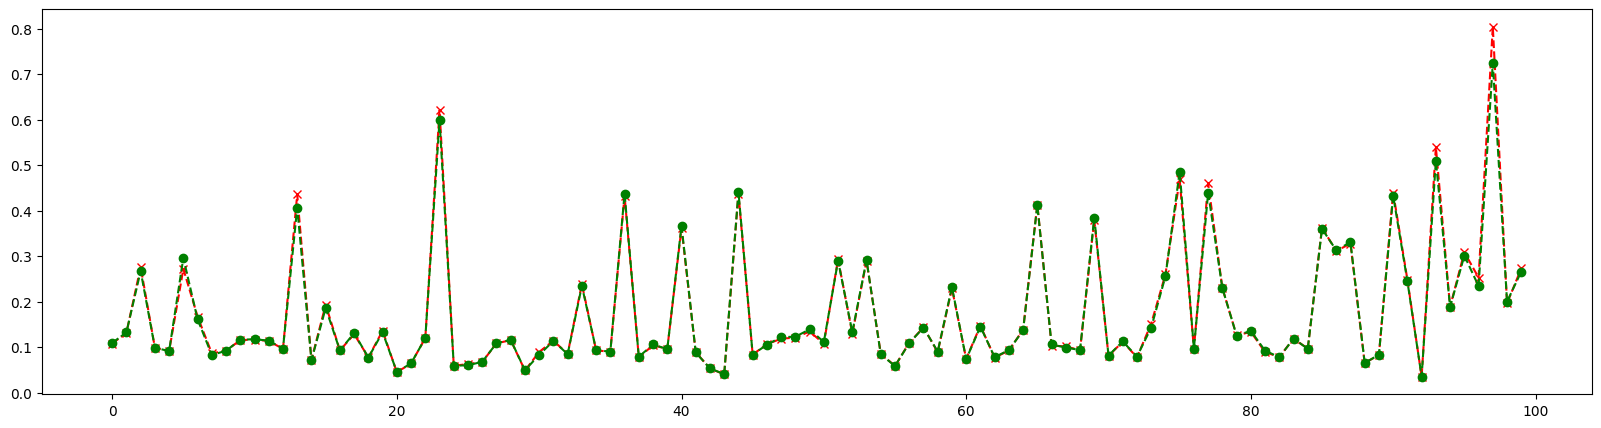

In [20]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [21]:
import joblib
joblib.dump(LR, 'STELLAR1.pkl')

['STELLAR1.pkl']

In [21]:
# import ydata_profiling as yp
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling.model import describe
# prof = ProfileReport(df)
# prof.to_file(output_file='stellar.html')